In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
def pretty_data(data):
    try:
        result = int(data)
        return result
    except:
        try:
            result = float(data)
            return result
        except:
            try:
                result = int(data.replace('$', '').replace('€', '').replace('£', '').replace(' ', ''))
                return result
            except:
                result = data
                return result

In [45]:
df = pd.read_csv('df_films_pages_1-13.csv')
df_budget = pd.read_csv('df_films_budget.csv')

df_merged = df.merge(df_budget, how='left', on='Название').drop('Ссылка', axis=1)

df_merged.dropna(inplace=True)
df_merged = df_merged.map(pretty_data)
print(df_merged.isna().sum())

df_merged.insert(df_merged.shape[1] - 1, 'Прибыль', df_merged['Сборы в мире($)'] - df_merged['Бюджет($)'])   # добавление нового признака (созданного самостоятельно)

N = 20
top_budget = df_merged.sort_values(by='Бюджет($)', ascending=False).head(N)
top_profit_usa = df_merged.sort_values(by='Сборы в США($)', ascending=False).head(N)
top_profit_world = df_merged.sort_values(by='Сборы в мире($)', ascending=False).head(N)

df_budget_profit = df_merged.sort_values(by='Бюджет($)')[['Бюджет($)', 'Сборы в мире($)']]

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i,y.iloc[i],x.iloc[i], rotation=90, ha='center')

labels = ['Номинант', 'Победитель']

def auto_pct(pct):
    return str(int(pct)) + '%\n(' + str(int(N*pct/100)) + ')'

Название                0
Название в оригинале    0
Год                     0
Продолжительность       0
Страна                  0
Жанр                    0
Режиссер                0
Рейтинг                 0
Бюджет($)               0
Сборы в США($)          0
Сборы в мире($)         0
Статус                  0
dtype: int64


##### *Убедились, что пробелы в данных отсутствуют и подготовили данные к визуализации окнчательно*

In [46]:
df_merged.head(10)

,Название,Название в оригинале,Год,Продолжительность,Страна,Жанр,Режиссер,Рейтинг,Бюджет($),Сборы в США($),Сборы в мире($),Прибыль,Статус
0,Оппенгеймер,Oppenheimer,2023,180,США,биография,Кристофер Нолан,8,100000000,329862540,972444774,872444774,Победитель
1,Оставленные,The Holdovers,2023,133,США,драма,Александр Пэйн,7,20000000,20355375,44644930,24644930,Номинант
2,Бедные-несчастные,Poor Things,2023,141,Ирландия,драма,Йоргос Лантимос,7,35000000,34553225,117463328,82463328,Номинант
3,Прошлые жизни,Past Lives,2023,105,США,мелодрама,Селин Сон,7,19000000,11185625,42333271,23333271,Номинант
4,Американское чтиво,American Fiction,2023,116,США,драма,Корд Джефферсон,7,24000000,21098470,22483370,-1516630,Номинант
5,Убийцы цветочной луны,Killers of the Flower Moon,2023,206,США,драма,Мартин Скорсезе,7,200000000,68026901,157026901,-42973099,Номинант
6,Зона интересов,The Zone of Interest,2023,105,США,драма,Джонатан Глейзер,6,15000000,8659464,48975567,33975567,Номинант
7,Анатомия падения,Anatomie d'une chute,2023,151,Франция,драма,Жюстин Трие,6,6200000,5076369,35608040,29408040,Номинант
8,Барби,Barbie,2023,114,США,комедия,Грета Гервиг,6,100000000,636238421,1445638421,1345638421,Номинант
9,Маэстро,Maestro,2023,129,США,биография,Брэдли Купер,6,80000000,57878,383532,-79616468,Номинант


#### *Таблица содержит 9 столбцов с текстовыми данными: название, название в оригинале, год, продолжиетльность, страна, жанр, режиссер, рейтинг и статус Оскара в номинации "Лучший фильм"*
#### *Также есть три столбца с числовыми данными: бюджет, сборы в США и мире*
#### *Еще в таблицу добавлен созданный признак - Прибыль фильма*

# Визуализации

## Топ-20 фильмов по бюджету, процентное соотношение номинантов и победителей

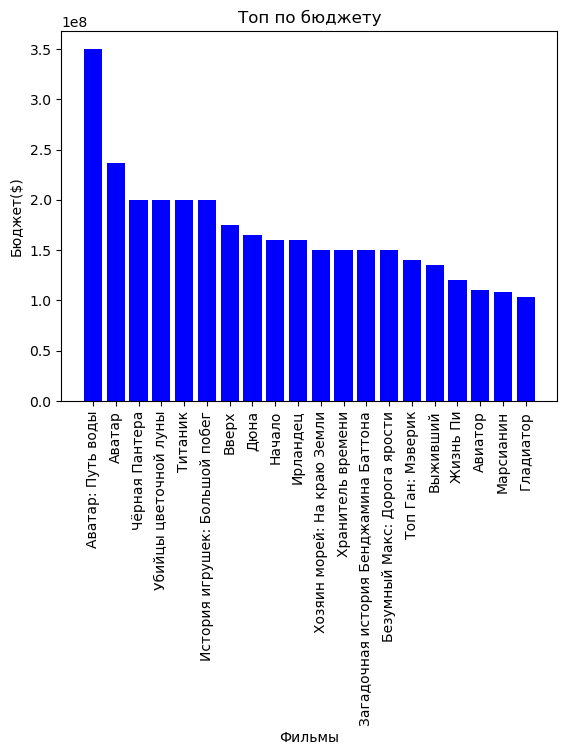

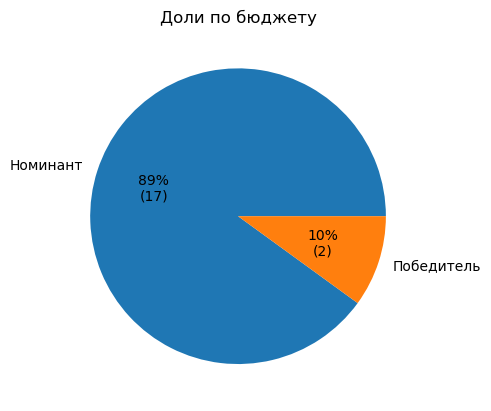

In [47]:
plt.xticks(rotation=90)
plt.bar(top_budget['Название'], top_budget['Бюджет($)'], color='b')
plt.title('Топ по бюджету')

plt.xlabel('Фильмы')
plt.ylabel('Бюджет($)')

plt.show()

nom_count = top_budget[top_budget['Статус'] == 'Номинант']['Название'].count()
win_count = N - nom_count

# круговая с долями по бюджету
plt.pie([nom_count, win_count], labels=labels, autopct=auto_pct)
plt.title('Доли по бюджету')
plt.show()

## Топ-20 фильмов по сборам США, процентное соотношение номинантов и победителей

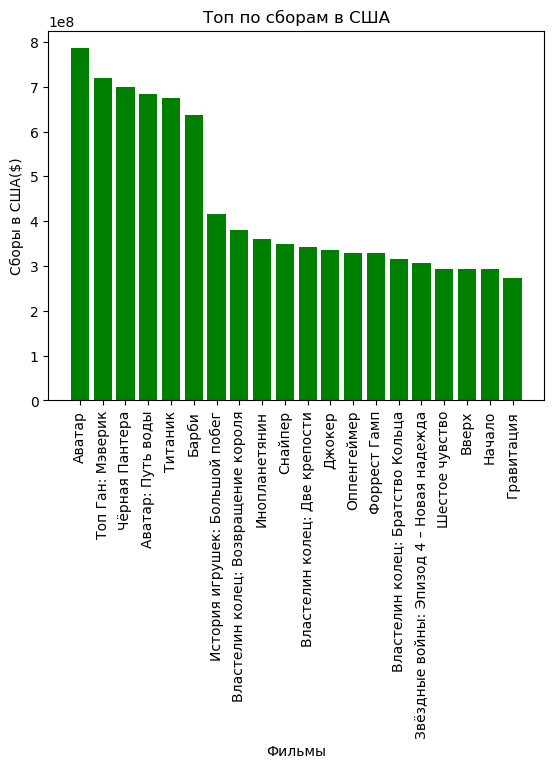

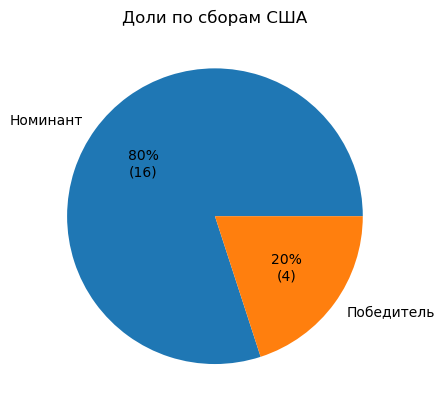

In [48]:
plt.xticks(rotation=90)
plt.bar(top_profit_usa['Название'], top_profit_usa['Сборы в США($)'], color='g')
plt.title('Топ по сборам в США')

plt.xlabel('Фильмы')
plt.ylabel('Сборы в США($)')

plt.show()

nom_count = top_profit_usa[top_profit_usa['Статус'] == 'Номинант']['Название'].count()
win_count = N - nom_count

# круговая с долями по сборам США
plt.pie([nom_count, win_count], labels=labels, autopct=auto_pct)
plt.title('Доли по сборам США')
plt.show()

## Топ-20 фильмов по сборам в мире, процентное соотношение номинантов и победителей

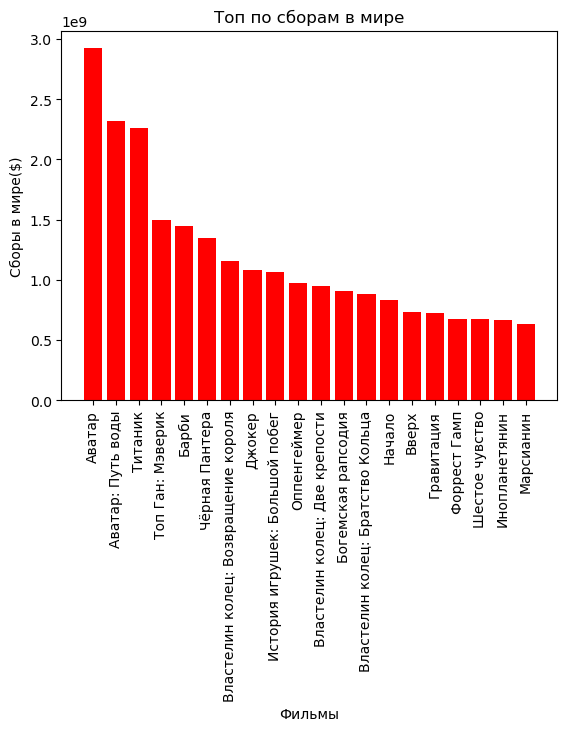

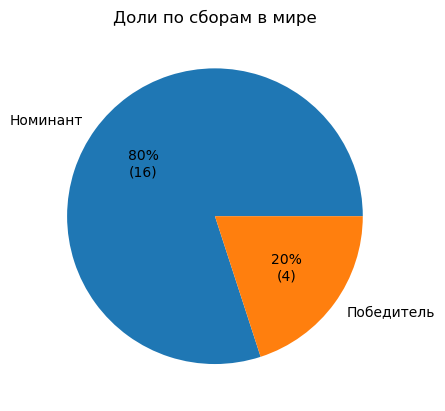

In [49]:
plt.xticks(rotation=90)
plt.bar(top_profit_world['Название'], top_profit_world['Сборы в мире($)'], color='r')
plt.title('Топ по сборам в мире')

plt.xlabel('Фильмы')
plt.ylabel('Сборы в мире($)')

plt.show()

nom_count = top_profit_world[top_profit_world['Статус'] == 'Номинант']['Название'].count()
win_count = N - nom_count

# круговая с долями по сборам в мире
plt.pie([nom_count, win_count], labels=labels, autopct=auto_pct)
plt.title('Доли по сборам в мире')
plt.show()

## Облако рассеяния для бюджетов и сборов фильмов

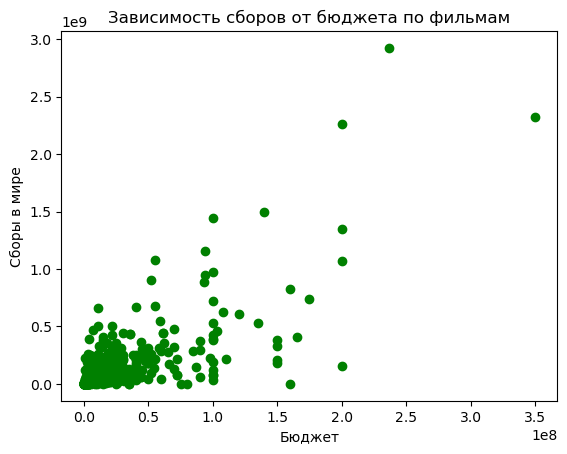

In [50]:
df = df_merged.sort_values(by='Бюджет($)')

plt.scatter(df_merged['Бюджет($)'], df_merged['Сборы в мире($)'], color='g')
plt.title('Зависимость сборов от бюджета по фильмам')
plt.xlabel('Бюджет')
plt.ylabel('Сборы в мире')
plt.show()

#### Выводы: ####

#### *Все построенные визуализации говорят о том, что "каждый получает по заслугам". Иными словами, от вложенных средств в проект будут напрямую зависеть сборы, а в дальнейшем и прибыль. На эту зависимость могут повлиять только неизмеряемые факторы такие, как реклама, интерес зрителей, социальное воздействие/повестка и тд*


# Проверка гипотез

#### *H0: фильм станет победителем в номинации "Лучший фильм", если его прибыль будет больше средней*
#### *H1: все иные исходы*

##### *Гипотеза будет проверена для каждого года, существования премии Оскар. То есть точная формулировка звучит так: если прибыль фильма больше средней за конкретной год, то она может стать победителем* 

In [51]:
sred_profit = df_merged.groupby(by='Год')['Прибыль'].mean() 
X_mat = df_merged['Прибыль'].mean()

k, n = 0, 0

for year, profit in sred_profit.items():
    data = df_merged[df_merged['Год'] == year]
    sigma = (((data['Прибыль'] - profit)**2).sum()/(data.shape[0] - 1))**0.5
    t = (X_mat - profit)/sigma * (data.shape[0])**0.5
    
    if data.shape[0] <= 1:
        continue

    if t < 2.58:   # уровень значимости 1%
        k += 1
    n += 1

print(k/len(sred_profit)*100)

55.670103092783506


#### *Нулевая гипотеза при уровне значимости принимается в 55% случаев. Иными словами, более чем в 50-ти киносезонах победителя номинации можно было определить с помощью математических подсчетов* 

# Машинное обучение

#### *Далее построена логистическая регрессиия для предсказания победителя в номинации "Лучший фильм" киноакадемии Оскар.*

Accuracy: 71.07%
Confusion Matrix:
 [[85 13]
 [22  1]]

Classification Report:
               precision    recall  f1-score   support

    Номинант       0.79      0.87      0.83        98
  Победитель       0.07      0.04      0.05        23

    accuracy                           0.71       121
   macro avg       0.43      0.46      0.44       121
weighted avg       0.66      0.71      0.68       121



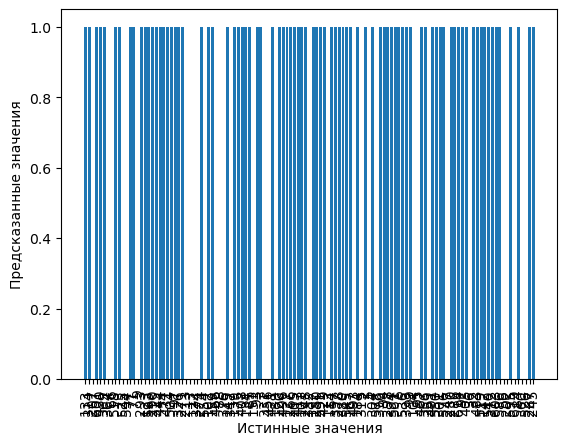

In [52]:
train_rows = int(df_merged.shape[0]*0.8)
df_merged = df_merged.sample(frac=1)

df_train = df_merged[:train_rows]
df_test = df_merged[train_rows:]

model = LogisticRegression()

X_train = df_train[['Прибыль']]
y_train = df_train['Статус']

X_test = df_test[['Прибыль']]

y_test = df_test['Статус']

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100)) # точность гипотезы

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# print(pd.Series(y_pred).value_counts())

plt.bar(df_test.index.astype(str), (y_test == y_pred).astype(int))
plt.xticks(rotation=90)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.show()


#### *Исходя из представленного отчета, можно точно заключить, что предсказание победителя в номинации "Лучший фильм" не работает, зато номинантов предсказывает отлично*